# Importing Necessary Packages

In [1]:
#packages for data data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
# Importing Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional
# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
#data scalling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()


# Reading the Data

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

# Data Preparation

### Dropping Un-necessary Columns

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [4]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [5]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [6]:
df['Date_Time'] =df['Date_Time'].values.astype(np.int64)
df.drop(['Day','Time'],axis=1,inplace=True)

# Features Correlation

In [15]:
df['h_log']=np.log(df['H'])
df['pm2.5_log']=np.log(df['PM2.5'])
df[df['Bio']==0]=1
df['bio_log']=np.log(df['Bio'])

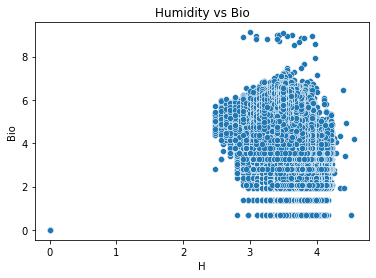

Pearson Correlation : 0.130268045978032


In [16]:
sns.scatterplot(x=df['h_log'],y=df['bio_log'])
plt.xlabel('H')
plt.ylabel('Bio')
plt.title('Humidity vs Bio')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['h_log'],df['bio_log'])[0][1])

In [17]:
df['t_log']=np.log(df['T'])

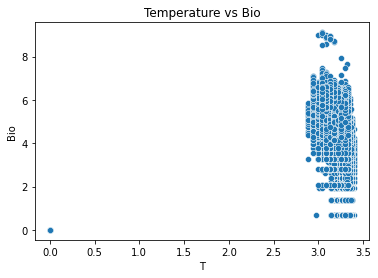

Pearson Correlation : 0.2356883223559614


In [18]:
sns.scatterplot(x=df['t_log'],y=df['bio_log'])
plt.xlabel('T')
plt.ylabel('Bio')
plt.title('Temperature vs Bio')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['t_log'],df['bio_log'])[0][1])

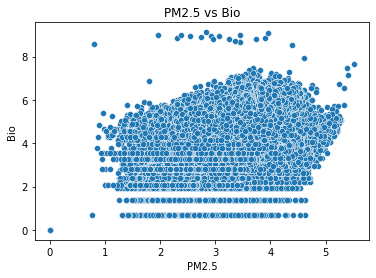

Pearson Correlation : 0.41339348271883697


In [19]:
sns.scatterplot(x=df['pm2.5_log'],y=df['bio_log'])
plt.xlabel('PM2.5')
plt.ylabel('Bio')
plt.title('PM2.5 vs Bio')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['pm2.5_log'],df['bio_log'])[0][1])

In [20]:
df['dust_log']=np.log(df['Dust'])

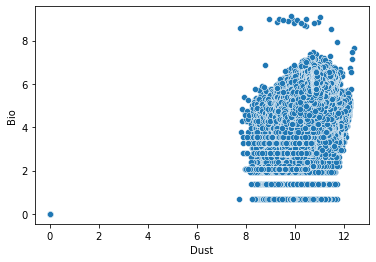

Pearson Correlation : 0.44273919969888026


In [21]:
sns.scatterplot(x=df['dust_log'],y=df['bio_log'])
plt.xlabel('Dust')
plt.ylabel('Bio')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['dust_log'],df['bio_log'])[0][1])

In [22]:
df['date_time_log']=np.log(df['Date_Time'])

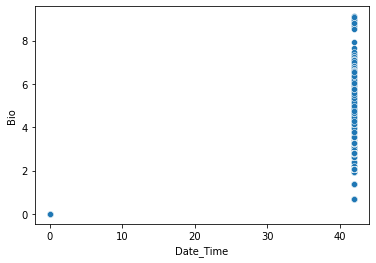

Pearson Correlation : 0.36517168953305623


In [23]:
sns.scatterplot(x=df['date_time_log'],y=df['bio_log'])
plt.xlabel('Date_Time')
plt.ylabel('Bio')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['date_time_log'],df['bio_log'])[0][1])

In [24]:
df.columns

Index(['Bio', 'Dust', 'T', 'H', 'PM2.5', 'Date_Time', 'h_log', 'pm2.5_log',
       'bio_log', 't_log', 'dust_log', 'date_time_log'],
      dtype='object')

In [25]:
X=df.drop(['Bio','H','T','Dust','Date_Time','PM2.5'],axis=1)
y=df['bio_log']

In [26]:
X.columns

Index(['h_log', 'pm2.5_log', 'bio_log', 't_log', 'dust_log', 'date_time_log'], dtype='object')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Permutation Importance

In [38]:
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
#models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))

In [46]:
permutation_imp={}

In [47]:
for name,model in models:
    regressor=model
    regressor.fit(X, y)
    # Calculate Permutation Importance
    result = permutation_importance(regressor, X_test, y_test, scoring='neg_mean_squared_error',n_repeats=10)

    # Access the importance scores
    importance_scores = result.importances_mean
    permutation_imp[model]=round(importance_scores[0],4)

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [48]:
permutation_imp_score=pd.DataFrame(permutation_imp,X.columns)
permutation_imp_score

,Ridge(),LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SGDRegressor()
h_log,0.0,0.0,0.0035,0.0,2.910671e+10
pm2.5_log,0.0,0.0,0.0035,0.0,2.910671e+10
bio_log,0.0,0.0,0.0035,0.0,2.910671e+10
t_log,0.0,0.0,0.0035,0.0,2.910671e+10
dust_log,0.0,0.0,0.0035,0.0,2.910671e+10
date_time_log,0.0,0.0,0.0035,0.0,2.910671e+10


In [32]:
# selecting on relevant features

In [96]:
X=df.drop(['Bio','H','T','Dust','Date_Time','PM2.5'],axis=1)
y=df['Bio']

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
#X=X.values.reshape(X.shape[0],1)

In [52]:
std_scaler=MinMaxScaler()

In [184]:
#X=std_scaler.fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.55)

# Willmote Index

In [64]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator))
    return wi

In [65]:
train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

In [66]:
models_names=['Ridge','LR','KNN Regressor','RF Regressor','DT Regressor','SGD Regressor']
              #,'SV Regressor']

In [67]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Create an instance of Elastic Net regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.1)

import xgboost as xgb

# Create an instance of XGBoost regressor
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)


+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  124.16795809880743
--------------------------------------------------
Mean absolute error (MAE) :  53.41405239442839
--------------------------------------------------
R2 score :  0.5002241516315928
--------------------------------------------------
CV Score :  [-1.04566519 -2.107515   -4.88219853  0.13853586 -0.07618149]
--------------------------------------------------
Willmott's Index: 0.45723847609576307
--------------------------------------------------


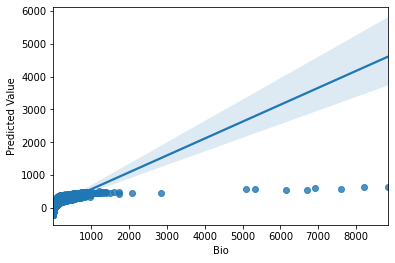

							-----------------------------------------------------------
							 Time for detection (Ridge) : 3.496 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  124.16638474593516
--------------------------------------------------
Mean absolute error (MAE) :  53.40243321264416
--------------------------------------------------
R2 score :  0.5002368170373344
--------------------------------------------------
CV Score :  [-1.05046335 -2.10361849 -4.8609135   0.13691387 -0.07498305]
--------------------------------------------------
Willmott's Index: 0.45735654324343344
--------------------------------------------------


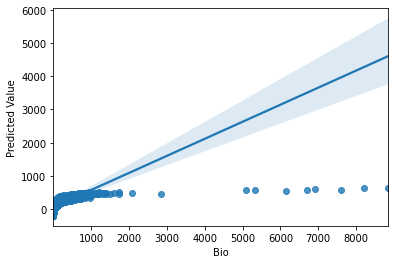

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 4.715 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  18.960021664194585
--------------------------------------------------
Mean absolute error (MAE) :  2.1311201896980254
--------------------------------------------------
R2 score :  0.9883471046881169
--------------------------------------------------
CV Score :  [0.957627   0.99219239 0.99862025 0.98615588 0.89613788]
--------------------------------------------------
Willmott's Index: 0.9783448364254003
--------------------------------------------------


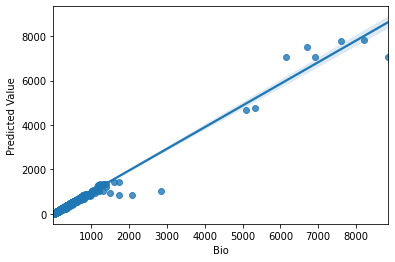

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 6.476 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  13.541816223345398
--------------------------------------------------
Mean absolute error (MAE) :  0.20358283575693514
--------------------------------------------------
R2 score :  0.9940555727319936
--------------------------------------------------
CV Score :  [0.99778568 0.99998798 0.99999705 0.99311079 0.98797642]
--------------------------------------------------
Willmott's Index: 0.9979313134798268
--------------------------------------------------


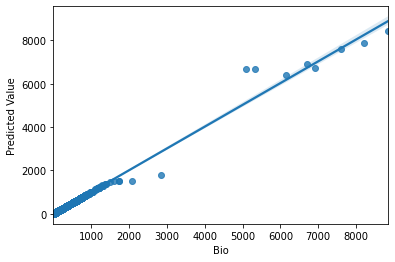

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 55.415 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  10.108237758790366
--------------------------------------------------
Mean absolute error (MAE) :  0.15064423049452905
--------------------------------------------------
R2 score :  0.9966878722188642
--------------------------------------------------
CV Score :  [0.99501323 0.99997278 0.99999672 0.98812548 0.99409934]
--------------------------------------------------
Willmott's Index: 0.9984692437954937
--------------------------------------------------


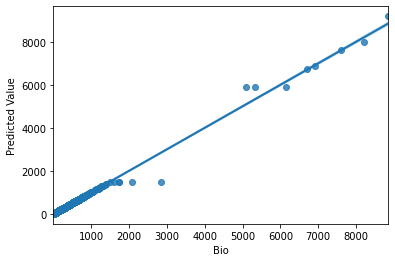

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 3.814 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before converg

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  1908975.1612854644
--------------------------------------------------
Mean absolute error (MAE) :  1251971.2721190348
--------------------------------------------------
R2 score :  -118129057.20579441
--------------------------------------------------
CV Score :  [-1.04682449e+07 -9.59429983e+06 -2.51443505e+10 -5.82971837e+06
 -2.04888366e+07]
--------------------------------------------------
Willmott's Index: -12720.780225956685
--------------------------------------------------


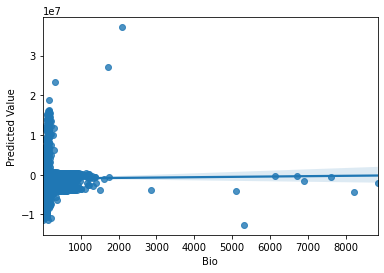

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 44.189 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+08, tolerance: 1.111e+05
  model = cd_fast.enet_coordinate_descent(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.204e+08, tolerance: 2.114e+05
  model = cd_fast.enet_coordinate_descent(
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

+ ==================================================================================================== +
			7-For Lasso Regression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  124.21245903021179
--------------------------------------------------
Mean absolute error (MAE) :  53.40831562025769
--------------------------------------------------
R2 score :  0.49986585507095227
--------------------------------------------------
CV Score :  [-1.0480456  -2.11523438 -4.92690621  0.13761836 -0.07856647]
--------------------------------------------------
Willmott's Index: 0.4572967697498036
--------------------------------------------------


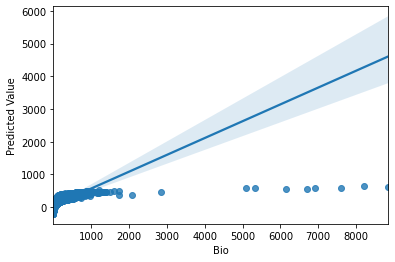

							-----------------------------------------------------------
							 Time for detection (Lasso Regression) : 8.939 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			8-For ElasticNet Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  125.7760086169069
--------------------------------------------------
Mean absolute error (MAE) :  57.28063556825259
--------------------------------------------------
R2 score :  0.4871955281742941
--------------------------------------------------
CV Score :  [-1.43392527 -2.79852817 -6.02791585  0.18312845 -0.13632654]
--------------------------------------------------
Willmott's Index: 0.4179485798671404
--------------------------------------------------


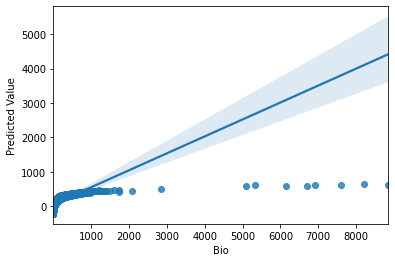

							-----------------------------------------------------------
							 Time for detection (ElasticNet Regressor) : 8.159 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			9-For Adaboost Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  14.358638503404727
--------------------------------------------------
Mean absolute error (MAE) :  0.19415478673256578
--------------------------------------------------
R2 score :  0.9933168269007414
--------------------------------------------------
CV Score :  [0.99501507 0.99998906 0.99999672 0.99381726 0.90346079]
--------------------------------------------------
Willmott's Index: 0.9980271156522237
--------------------------------------------------


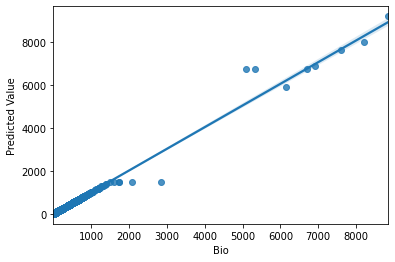

							-----------------------------------------------------------
							 Time for detection (Adaboost Regressor) : 89.691 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			10-For XGboost Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  9.606154456584175
--------------------------------------------------
Mean absolute error (MAE) :  0.14591397880993615
--------------------------------------------------
R2 score :  0.9970087320548481
--------------------------------------------------
CV Score :  [0.99540367 0.99998514 0.99999698 0.99664332 0.99114119]
--------------------------------------------------
Willmott's Index: 0.9985173097724734
--------------------------------------------------


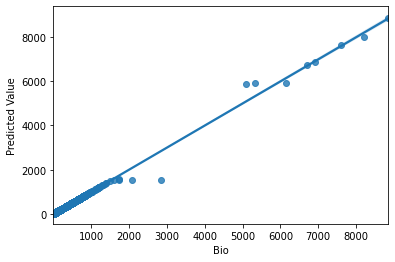

							-----------------------------------------------------------
							 Time for detection (XGboost Regressor) : 20.872 seconds...
							-----------------------------------------------------------



In [68]:


# Create an instance of Lasso regression
lasso = Lasso(alpha=0.1)
# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))
models.append(('Lasso Regression',  Lasso(alpha=0.01)))
models.append(('ElasticNet Regressor',  ElasticNet(alpha=0.01, l1_ratio=0.05)))
models.append(('Adaboost Regressor', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.1)))
models.append(('XGboost Regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)))


train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(round(train,4))
    test_l.append(round(test,4))
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(round(rmse,4))
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(round(mae,4))
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(round(r2,4))
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_scores.append(round(np.mean(scores),4))


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print('CV Score : ', scores)
    print("-"*50)
    
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(round(wi,4))
    print("-"*50)
    #wi = willmott_index(y_test, predictions)
    
    
    sns.regplot(x=y_test,y=predictions)
    plt.ylabel("Predicted Value")
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    


In [69]:
report = pd.DataFrame({"Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l,
                     "R2 Score": r2_l,
                    "Willmot Index": wi_l})
report

,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,4.220000e-01,5.002000e-01,5.341410e+01,1.241680e+02,5.002000e-01,0.4572
1,4.221000e-01,5.002000e-01,5.340240e+01,1.241664e+02,5.002000e-01,0.4574
2,9.939000e-01,9.883000e-01,2.131100e+00,1.896000e+01,9.883000e-01,0.9783
3,9.995000e-01,9.941000e-01,2.036000e-01,1.354180e+01,9.941000e-01,0.9979
4,1.000000e+00,9.967000e-01,1.506000e-01,1.010820e+01,9.967000e-01,0.9985
5,-9.590936e+07,-1.181291e+08,1.251971e+06,1.908975e+06,-1.181291e+08,-12720.7802
6,4.216000e-01,4.999000e-01,5.340830e+01,1.242125e+02,4.999000e-01,0.4573
7,4.119000e-01,4.872000e-01,5.728060e+01,1.257760e+02,4.872000e-01,0.4179
8,1.000000e+00,9.933000e-01,1.942000e-01,1.435860e+01,9.933000e-01,0.9980
9,1.000000e+00,9.970000e-01,1.459000e-01,9.606200e+00,9.970000e-01,0.9985


In [108]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your data in X (features) and y (target variable)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=512)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_val_pred=model.predict(X_test)
mse, rmse, mae, r2 = evaluate_regression(y_test, y_val_pred)
print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))
wi=willmott_index(y_test, y_val_pred)
print(wi)

Epoch 1/2000
100/100 [==============================] - 1s 3ms/step - loss: 35584.3008
Epoch 2/2000
100/100 [==============================] - 0s 3ms/step - loss: 32198.0898
Epoch 3/2000
100/100 [==============================] - 0s 3ms/step - loss: 30934.2734
Epoch 4/2000
100/100 [==============================] - 0s 3ms/step - loss: 27132.2520
Epoch 5/2000
100/100 [==============================] - 0s 3ms/step - loss: 20340.6055
Epoch 6/2000
100/100 [==============================] - 0s 3ms/step - loss: 15450.6924
Epoch 7/2000
100/100 [==============================] - 0s 3ms/step - loss: 13156.2402
Epoch 8/2000
100/100 [==============================] - 0s 3ms/step - loss: 11853.5186
Epoch 9/2000
100/100 [==============================] - 0s 3ms/step - loss: 11125.6885
Epoch 10/2000
100/100 [==============================] - 0s 3ms/step - loss: 10470.9473
Epoch 11/2000
100/100 [==============================] - 0s 3ms/step - loss: 9983.6689: 0s - loss: 805
Epoch 12/2000
100/100 [===

100/100 [==============================] - 0s 3ms/step - loss: 154.1246
Epoch 96/2000
100/100 [==============================] - 0s 3ms/step - loss: 220.2851
Epoch 97/2000
100/100 [==============================] - 0s 3ms/step - loss: 162.7797
Epoch 98/2000
100/100 [==============================] - 0s 3ms/step - loss: 167.2317
Epoch 99/2000
100/100 [==============================] - 0s 3ms/step - loss: 166.3691
Epoch 100/2000
100/100 [==============================] - 0s 3ms/step - loss: 146.8795
Epoch 101/2000
100/100 [==============================] - 0s 3ms/step - loss: 178.4897
Epoch 102/2000
100/100 [==============================] - 0s 3ms/step - loss: 185.0965
Epoch 103/2000
100/100 [==============================] - 0s 3ms/step - loss: 139.8154
Epoch 104/2000
100/100 [==============================] - 0s 3ms/step - loss: 155.7442
Epoch 105/2000
100/100 [==============================] - 0s 3ms/step - loss: 121.2812
Epoch 106/2000
100/100 [==============================] - 0s 3

Epoch 190/2000
100/100 [==============================] - 0s 3ms/step - loss: 97.4269
Epoch 191/2000
100/100 [==============================] - 0s 3ms/step - loss: 98.5755
Epoch 192/2000
100/100 [==============================] - 0s 3ms/step - loss: 71.1012
Epoch 193/2000
100/100 [==============================] - 0s 3ms/step - loss: 67.4947
Epoch 194/2000
100/100 [==============================] - 0s 3ms/step - loss: 77.0711
Epoch 195/2000
100/100 [==============================] - 0s 3ms/step - loss: 76.2144
Epoch 196/2000
100/100 [==============================] - 0s 3ms/step - loss: 79.8841
Epoch 197/2000
100/100 [==============================] - 0s 3ms/step - loss: 67.0757
Epoch 198/2000
100/100 [==============================] - 0s 3ms/step - loss: 61.7670
Epoch 199/2000
100/100 [==============================] - 0s 3ms/step - loss: 99.7126
Epoch 200/2000
100/100 [==============================] - 0s 3ms/step - loss: 67.6879
Epoch 201/2000
100/100 [==============================

100/100 [==============================] - 0s 4ms/step - loss: 72.7892
Epoch 285/2000
100/100 [==============================] - 0s 4ms/step - loss: 85.9457
Epoch 286/2000
100/100 [==============================] - 0s 4ms/step - loss: 88.9803
Epoch 287/2000
100/100 [==============================] - 0s 5ms/step - loss: 51.6457
Epoch 288/2000
100/100 [==============================] - 0s 4ms/step - loss: 45.7723
Epoch 289/2000
100/100 [==============================] - ETA: 0s - loss: 37.66 - 1s 5ms/step - loss: 38.0238
Epoch 290/2000
100/100 [==============================] - 1s 5ms/step - loss: 35.3801
Epoch 291/2000
100/100 [==============================] - 0s 5ms/step - loss: 15.4761
Epoch 292/2000
100/100 [==============================] - 1s 5ms/step - loss: 94.5704
Epoch 293/2000
100/100 [==============================] - 0s 5ms/step - loss: 54.5347
Epoch 294/2000
100/100 [==============================] - 0s 5ms/step - loss: 62.6115
Epoch 295/2000
100/100 [=====================

100/100 [==============================] - 0s 5ms/step - loss: 39.1095
Epoch 380/2000
100/100 [==============================] - 0s 5ms/step - loss: 95.2507
Epoch 381/2000
100/100 [==============================] - 0s 4ms/step - loss: 50.4704
Epoch 382/2000
100/100 [==============================] - 0s 4ms/step - loss: 59.8809
Epoch 383/2000
100/100 [==============================] - 0s 5ms/step - loss: 27.3029
Epoch 384/2000
100/100 [==============================] - 0s 4ms/step - loss: 51.2472
Epoch 385/2000
100/100 [==============================] - 0s 5ms/step - loss: 42.3580
Epoch 386/2000
100/100 [==============================] - 0s 5ms/step - loss: 30.2319
Epoch 387/2000
100/100 [==============================] - 0s 5ms/step - loss: 79.0007
Epoch 388/2000
100/100 [==============================] - 0s 5ms/step - loss: 55.9416
Epoch 389/2000
100/100 [==============================] - 0s 5ms/step - loss: 45.1839
Epoch 390/2000
100/100 [==============================] - 0s 4ms/step

100/100 [==============================] - 0s 5ms/step - loss: 211.5725
Epoch 475/2000
100/100 [==============================] - 0s 5ms/step - loss: 56.4890
Epoch 476/2000
100/100 [==============================] - 0s 5ms/step - loss: 28.3677
Epoch 477/2000
100/100 [==============================] - 0s 5ms/step - loss: 38.6419
Epoch 478/2000
100/100 [==============================] - 0s 5ms/step - loss: 103.1162
Epoch 479/2000
100/100 [==============================] - 0s 4ms/step - loss: 48.0657
Epoch 480/2000
100/100 [==============================] - 0s 5ms/step - loss: 41.3287
Epoch 481/2000
100/100 [==============================] - 0s 5ms/step - loss: 36.0616
Epoch 482/2000
100/100 [==============================] - 0s 5ms/step - loss: 23.1117
Epoch 483/2000
100/100 [==============================] - 1s 5ms/step - loss: 33.6319
Epoch 484/2000
100/100 [==============================] - 0s 4ms/step - loss: 41.4460
Epoch 485/2000
100/100 [==============================] - 0s 4ms/st

100/100 [==============================] - 0s 5ms/step - loss: 38.9647
Epoch 570/2000
100/100 [==============================] - 1s 5ms/step - loss: 22.9607
Epoch 571/2000
100/100 [==============================] - 1s 5ms/step - loss: 23.3961
Epoch 572/2000
100/100 [==============================] - 1s 5ms/step - loss: 32.8542
Epoch 573/2000
100/100 [==============================] - 1s 5ms/step - loss: 61.8088
Epoch 574/2000
100/100 [==============================] - 0s 5ms/step - loss: 42.9356
Epoch 575/2000
100/100 [==============================] - 1s 5ms/step - loss: 23.2973
Epoch 576/2000
100/100 [==============================] - 1s 5ms/step - loss: 64.2736
Epoch 577/2000
100/100 [==============================] - 1s 5ms/step - loss: 45.2287
Epoch 578/2000
100/100 [==============================] - 1s 6ms/step - loss: 38.6790
Epoch 579/2000
100/100 [==============================] - 1s 6ms/step - loss: 27.2525
Epoch 580/2000
100/100 [==============================] - 1s 5ms/step

100/100 [==============================] - 0s 5ms/step - loss: 27.5478: 0s - l
Epoch 665/2000
100/100 [==============================] - 0s 5ms/step - loss: 64.2892
Epoch 666/2000
100/100 [==============================] - 1s 5ms/step - loss: 41.0791
Epoch 667/2000
100/100 [==============================] - 1s 5ms/step - loss: 23.0693
Epoch 668/2000
100/100 [==============================] - 1s 6ms/step - loss: 15.3621
Epoch 669/2000
100/100 [==============================] - 1s 5ms/step - loss: 34.8353
Epoch 670/2000
100/100 [==============================] - 1s 5ms/step - loss: 47.4547
Epoch 671/2000
100/100 [==============================] - 0s 5ms/step - loss: 16.4614
Epoch 672/2000
100/100 [==============================] - 1s 5ms/step - loss: 30.9788
Epoch 673/2000
100/100 [==============================] - 1s 5ms/step - loss: 36.0986
Epoch 674/2000
100/100 [==============================] - 1s 5ms/step - loss: 30.9143
Epoch 675/2000
100/100 [==============================] - 1s 

100/100 [==============================] - 0s 4ms/step - loss: 15.2396
Epoch 759/2000
100/100 [==============================] - 1s 5ms/step - loss: 68.3676
Epoch 760/2000
100/100 [==============================] - 0s 5ms/step - loss: 22.2387
Epoch 761/2000
100/100 [==============================] - 0s 5ms/step - loss: 19.3484
Epoch 762/2000
100/100 [==============================] - 0s 4ms/step - loss: 17.3941
Epoch 763/2000
100/100 [==============================] - 0s 5ms/step - loss: 24.1141
Epoch 764/2000
100/100 [==============================] - 0s 5ms/step - loss: 22.5521: 0s - l
Epoch 765/2000
100/100 [==============================] - 0s 5ms/step - loss: 19.8986
Epoch 766/2000
100/100 [==============================] - 0s 5ms/step - loss: 24.5005
Epoch 767/2000
100/100 [==============================] - 0s 5ms/step - loss: 64.1724
Epoch 768/2000
100/100 [==============================] - 0s 5ms/step - loss: 20.1388
Epoch 769/2000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s 4ms/step - loss: 25.1220
Epoch 854/2000
100/100 [==============================] - 0s 5ms/step - loss: 10.5343
Epoch 855/2000
100/100 [==============================] - 0s 5ms/step - loss: 12.8372
Epoch 856/2000
100/100 [==============================] - 1s 6ms/step - loss: 18.6359
Epoch 857/2000
100/100 [==============================] - 0s 4ms/step - loss: 219.0113
Epoch 858/2000
100/100 [==============================] - 0s 4ms/step - loss: 47.3716
Epoch 859/2000
100/100 [==============================] - 0s 4ms/step - loss: 36.3929
Epoch 860/2000
100/100 [==============================] - 0s 4ms/step - loss: 21.2596
Epoch 861/2000
100/100 [==============================] - 0s 5ms/step - loss: 10.1096
Epoch 862/2000
100/100 [==============================] - 0s 4ms/step - loss: 16.6909
Epoch 863/2000
100/100 [==============================] - 0s 5ms/step - loss: 13.8606
Epoch 864/2000
100/100 [==============================] - 0s 4ms/ste

100/100 [==============================] - 0s 5ms/step - loss: 14.5304
Epoch 949/2000
100/100 [==============================] - 0s 4ms/step - loss: 24.2354
Epoch 950/2000
100/100 [==============================] - 0s 4ms/step - loss: 15.3710
Epoch 951/2000
100/100 [==============================] - 0s 4ms/step - loss: 18.3548
Epoch 952/2000
100/100 [==============================] - 0s 4ms/step - loss: 70.5641
Epoch 953/2000
100/100 [==============================] - 0s 4ms/step - loss: 24.0484
Epoch 954/2000
100/100 [==============================] - 0s 4ms/step - loss: 15.1457
Epoch 955/2000
100/100 [==============================] - 0s 4ms/step - loss: 21.7150
Epoch 956/2000
100/100 [==============================] - 0s 4ms/step - loss: 15.8277
Epoch 957/2000
100/100 [==============================] - 0s 4ms/step - loss: 11.1618
Epoch 958/2000
100/100 [==============================] - 0s 4ms/step - loss: 59.4109
Epoch 959/2000
100/100 [==============================] - 0s 4ms/step

100/100 [==============================] - 0s 4ms/step - loss: 19.8658
Epoch 1043/2000
100/100 [==============================] - 0s 4ms/step - loss: 84.2454: 0s -
Epoch 1044/2000
100/100 [==============================] - 0s 4ms/step - loss: 16.5882
Epoch 1045/2000
100/100 [==============================] - 0s 5ms/step - loss: 28.6526: 0s -
Epoch 1046/2000
100/100 [==============================] - 0s 5ms/step - loss: 14.3147
Epoch 1047/2000
100/100 [==============================] - 0s 4ms/step - loss: 19.5458
Epoch 1048/2000
100/100 [==============================] - 0s 4ms/step - loss: 35.4826
Epoch 1049/2000
100/100 [==============================] - 0s 4ms/step - loss: 11.8944
Epoch 1050/2000
100/100 [==============================] - 0s 4ms/step - loss: 15.0373
Epoch 1051/2000
100/100 [==============================] - 0s 4ms/step - loss: 24.8299
Epoch 1052/2000
100/100 [==============================] - 0s 4ms/step - loss: 18.3590
Epoch 1053/2000
100/100 [======================

100/100 [==============================] - 0s 3ms/step - loss: 26.2956
Epoch 1137/2000
100/100 [==============================] - 0s 3ms/step - loss: 26.1632
Epoch 1138/2000
100/100 [==============================] - 0s 3ms/step - loss: 20.4149
Epoch 1139/2000
100/100 [==============================] - 0s 3ms/step - loss: 49.5412
Epoch 1140/2000
100/100 [==============================] - 0s 3ms/step - loss: 85.9062
Epoch 1141/2000
100/100 [==============================] - 0s 3ms/step - loss: 23.7477
Epoch 1142/2000
100/100 [==============================] - 0s 3ms/step - loss: 24.4460
Epoch 1143/2000
100/100 [==============================] - 0s 3ms/step - loss: 11.3691
Epoch 1144/2000
100/100 [==============================] - 0s 3ms/step - loss: 12.8436
Epoch 1145/2000
100/100 [==============================] - 0s 3ms/step - loss: 14.2691
Epoch 1146/2000
100/100 [==============================] - 0s 3ms/step - loss: 34.5803
Epoch 1147/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 2ms/step - loss: 13.5771
Epoch 1231/2000
100/100 [==============================] - 0s 2ms/step - loss: 20.5112
Epoch 1232/2000
100/100 [==============================] - 0s 2ms/step - loss: 15.6504
Epoch 1233/2000
100/100 [==============================] - 0s 2ms/step - loss: 20.2186
Epoch 1234/2000
100/100 [==============================] - 0s 2ms/step - loss: 11.2673
Epoch 1235/2000
100/100 [==============================] - 0s 2ms/step - loss: 41.4777
Epoch 1236/2000
100/100 [==============================] - 0s 2ms/step - loss: 56.2072
Epoch 1237/2000
100/100 [==============================] - 0s 2ms/step - loss: 23.9588
Epoch 1238/2000
100/100 [==============================] - 0s 2ms/step - loss: 25.5763
Epoch 1239/2000
100/100 [==============================] - 0s 2ms/step - loss: 26.9678
Epoch 1240/2000
100/100 [==============================] - 0s 2ms/step - loss: 24.7919
Epoch 1241/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 3ms/step - loss: 18.9260
Epoch 1325/2000
100/100 [==============================] - 0s 2ms/step - loss: 7.9683
Epoch 1326/2000
100/100 [==============================] - 0s 2ms/step - loss: 10.0849
Epoch 1327/2000
100/100 [==============================] - 0s 2ms/step - loss: 13.8508
Epoch 1328/2000
100/100 [==============================] - 0s 2ms/step - loss: 14.3228
Epoch 1329/2000
100/100 [==============================] - 0s 2ms/step - loss: 38.4531
Epoch 1330/2000
100/100 [==============================] - 0s 2ms/step - loss: 22.7250
Epoch 1331/2000
100/100 [==============================] - 0s 2ms/step - loss: 19.5996
Epoch 1332/2000
100/100 [==============================] - 0s 2ms/step - loss: 34.8954
Epoch 1333/2000
100/100 [==============================] - 0s 3ms/step - loss: 6.4324
Epoch 1334/2000
100/100 [==============================] - 0s 3ms/step - loss: 54.0013
Epoch 1335/2000
100/100 [==============================] - 0s

100/100 [==============================] - 0s 3ms/step - loss: 27.9131
Epoch 1419/2000
100/100 [==============================] - 0s 3ms/step - loss: 19.7365
Epoch 1420/2000
100/100 [==============================] - 0s 2ms/step - loss: 10.6485
Epoch 1421/2000
100/100 [==============================] - 0s 2ms/step - loss: 23.9046
Epoch 1422/2000
100/100 [==============================] - 0s 3ms/step - loss: 11.5447
Epoch 1423/2000
100/100 [==============================] - 0s 2ms/step - loss: 13.4072
Epoch 1424/2000
100/100 [==============================] - 0s 3ms/step - loss: 72.2046
Epoch 1425/2000
100/100 [==============================] - 0s 2ms/step - loss: 89.2136
Epoch 1426/2000
100/100 [==============================] - 0s 2ms/step - loss: 25.5978
Epoch 1427/2000
100/100 [==============================] - 0s 3ms/step - loss: 18.1993
Epoch 1428/2000
100/100 [==============================] - 0s 2ms/step - loss: 9.2667
Epoch 1429/2000
100/100 [==============================] - 0

100/100 [==============================] - 0s 3ms/step - loss: 11.2371
Epoch 1513/2000
100/100 [==============================] - 0s 3ms/step - loss: 35.8876
Epoch 1514/2000
100/100 [==============================] - 0s 2ms/step - loss: 85.6193
Epoch 1515/2000
100/100 [==============================] - 0s 3ms/step - loss: 79.9488
Epoch 1516/2000
100/100 [==============================] - 0s 2ms/step - loss: 86.6665
Epoch 1517/2000
100/100 [==============================] - 0s 3ms/step - loss: 18.3109
Epoch 1518/2000
100/100 [==============================] - 0s 3ms/step - loss: 32.9060
Epoch 1519/2000
100/100 [==============================] - 0s 3ms/step - loss: 12.5379
Epoch 1520/2000
100/100 [==============================] - 0s 3ms/step - loss: 11.3251
Epoch 1521/2000
100/100 [==============================] - 0s 3ms/step - loss: 9.2998
Epoch 1522/2000
100/100 [==============================] - 0s 2ms/step - loss: 15.2884
Epoch 1523/2000
100/100 [==============================] - 0

100/100 [==============================] - 0s 3ms/step - loss: 14.0683
Epoch 1607/2000
100/100 [==============================] - 0s 2ms/step - loss: 11.4672
Epoch 1608/2000
100/100 [==============================] - 0s 3ms/step - loss: 34.8288
Epoch 1609/2000
100/100 [==============================] - 0s 3ms/step - loss: 6.9061
Epoch 1610/2000
100/100 [==============================] - 0s 3ms/step - loss: 21.2660
Epoch 1611/2000
100/100 [==============================] - 0s 3ms/step - loss: 9.5330
Epoch 1612/2000
100/100 [==============================] - 0s 2ms/step - loss: 11.0354
Epoch 1613/2000
100/100 [==============================] - 0s 3ms/step - loss: 23.7337
Epoch 1614/2000
100/100 [==============================] - 0s 3ms/step - loss: 21.2490
Epoch 1615/2000
100/100 [==============================] - 0s 3ms/step - loss: 16.3975
Epoch 1616/2000
100/100 [==============================] - 0s 2ms/step - loss: 14.5024
Epoch 1617/2000
100/100 [==============================] - 0s

100/100 [==============================] - 0s 3ms/step - loss: 38.1994
Epoch 1701/2000
100/100 [==============================] - 0s 2ms/step - loss: 11.3495
Epoch 1702/2000
100/100 [==============================] - 0s 3ms/step - loss: 27.4805
Epoch 1703/2000
100/100 [==============================] - 0s 3ms/step - loss: 14.8582
Epoch 1704/2000
100/100 [==============================] - 0s 3ms/step - loss: 15.8221
Epoch 1705/2000
100/100 [==============================] - 0s 2ms/step - loss: 12.9097
Epoch 1706/2000
100/100 [==============================] - 0s 2ms/step - loss: 28.3477
Epoch 1707/2000
100/100 [==============================] - 0s 3ms/step - loss: 10.9036
Epoch 1708/2000
100/100 [==============================] - 0s 3ms/step - loss: 25.4052
Epoch 1709/2000
100/100 [==============================] - 0s 3ms/step - loss: 38.4215
Epoch 1710/2000
100/100 [==============================] - 0s 2ms/step - loss: 22.3521
Epoch 1711/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 2ms/step - loss: 32.3568
Epoch 1795/2000
100/100 [==============================] - 0s 2ms/step - loss: 27.1508
Epoch 1796/2000
100/100 [==============================] - 0s 3ms/step - loss: 12.8847
Epoch 1797/2000
100/100 [==============================] - 0s 3ms/step - loss: 16.8493
Epoch 1798/2000
100/100 [==============================] - 0s 3ms/step - loss: 13.4191
Epoch 1799/2000
100/100 [==============================] - 0s 3ms/step - loss: 12.7767
Epoch 1800/2000
100/100 [==============================] - 0s 3ms/step - loss: 10.4196
Epoch 1801/2000
100/100 [==============================] - 0s 3ms/step - loss: 30.1737
Epoch 1802/2000
100/100 [==============================] - 0s 2ms/step - loss: 26.6062
Epoch 1803/2000
100/100 [==============================] - 0s 2ms/step - loss: 33.5981
Epoch 1804/2000
100/100 [==============================] - 0s 2ms/step - loss: 25.3344
Epoch 1805/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 3ms/step - loss: 20.7692
Epoch 1889/2000
100/100 [==============================] - 0s 3ms/step - loss: 33.4981
Epoch 1890/2000
100/100 [==============================] - 0s 3ms/step - loss: 71.3667
Epoch 1891/2000
100/100 [==============================] - 0s 3ms/step - loss: 58.2611
Epoch 1892/2000
100/100 [==============================] - 0s 3ms/step - loss: 23.2715
Epoch 1893/2000
100/100 [==============================] - 0s 3ms/step - loss: 11.2320
Epoch 1894/2000
100/100 [==============================] - 0s 3ms/step - loss: 13.7287
Epoch 1895/2000
100/100 [==============================] - 0s 3ms/step - loss: 30.0154
Epoch 1896/2000
100/100 [==============================] - 0s 3ms/step - loss: 21.6665
Epoch 1897/2000
100/100 [==============================] - 0s 3ms/step - loss: 39.8495
Epoch 1898/2000
100/100 [==============================] - 0s 3ms/step - loss: 8.4611
Epoch 1899/2000
100/100 [==============================] - 0

100/100 [==============================] - 0s 3ms/step - loss: 9.7315
Epoch 1983/2000
100/100 [==============================] - 0s 3ms/step - loss: 30.2795
Epoch 1984/2000
100/100 [==============================] - 0s 3ms/step - loss: 41.1008
Epoch 1985/2000
100/100 [==============================] - 0s 3ms/step - loss: 11.7610
Epoch 1986/2000
100/100 [==============================] - 0s 3ms/step - loss: 26.9350
Epoch 1987/2000
100/100 [==============================] - 0s 3ms/step - loss: 9.6184
Epoch 1988/2000
100/100 [==============================] - 0s 3ms/step - loss: 10.2108
Epoch 1989/2000
100/100 [==============================] - 0s 3ms/step - loss: 10.3783
Epoch 1990/2000
100/100 [==============================] - 0s 3ms/step - loss: 16.9267
Epoch 1991/2000
100/100 [==============================] - 0s 3ms/step - loss: 16.0874
Epoch 1992/2000
100/100 [==============================] - 0s 3ms/step - loss: 40.1887
Epoch 1993/2000
100/100 [==============================] - 0s

ValueError: Data must be 1-dimensional

In [109]:
a=np.reshape(y_val_pred,y_val_pred.shape[0])

In [110]:
wi=willmott_index(y_test, a)
wi

0.9951460149081549

# LSTM and BiLSTM

In [78]:
X=df.drop(['Bio','H','T','Dust','Date_Time','PM2.5'],axis=1)
y=df['Bio']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.55)

In [80]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0],1,X_train.shape[1]))
test_data = np.resize(X_test, (X_test.shape[0], 1,X_test.shape[1]))
train_labels=y_train
test_labels=y_test
#test_labels=np.resize(test_labels, (test_labels.shape[0], 1, 1))
#train_labels=np.resize(train_labels, (train_labels.shape[0], 1, 1))

# LSTM

In [85]:
# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(1,6),return_sequences=True))  # LSTM layer with 64 units
    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(units=1))
    return model

# Define BiLSTM model
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128), input_shape=(1, 6)))
    model.add(Dense(1))
    return model

# Define evaluation metrics
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Model Training

In [93]:
# Create and compile LSTM model
model = create_lstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(train_data, train_labels, epochs=1000, batch_size=32, verbose=0,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()
y_val_pred = model.predict(test_data)
y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],1)
#test_labels=test_labels.reshape(test_labels.shape[0],test_labels.shape[1])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)
print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))

KeyboardInterrupt: 

# BiLSTM

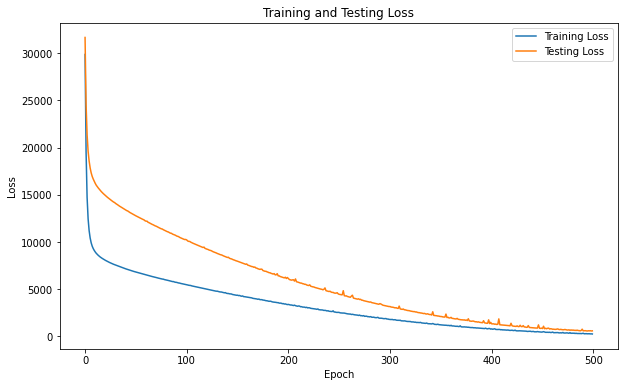

Evaluation Metrics LSTM:
Test MSE: 588.2657881945006
Test RMSE: 24.25419114698531
Test MAE: 1.4440426414116374
Test R^2: 0.98456


In [88]:
# Create and compile BiLSTM model
model = create_bilstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=500, batch_size=32, verbose=0,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
#y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))

In [89]:
X=np.concatenate((train_data, test_data), axis=0)

In [90]:
#train_labels=train_labels.reshape(train_labels.shape[0],train_labels.shape[1])
y=np.concatenate((train_labels, test_labels), axis=0)

# LSTM Cross Validation

In [91]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mae_l = []
mse_l=[]
rmse_l = []
r2_l = []
wi_l = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_lstm_model()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
    # Evaluate LSTM model on validation data
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]*y_pred.shape[2])
    mse, rmse, mae, r2 = evaluate_regression(y_test, y_pred)
    wi=willmott_index(y_test,y_pred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    wi_l.append(wi)

print("Cross Validation MSE:",np.mean(mse_l))
print("Cross Validation RMSE:",np.mean(rmse_l))
print("Cross Validation MAE:",np.mean(mae_l))
print("Cross Validation R2:",np.mean(r2_l))
print("Cross Validation WI:",np.mean(wi_l))

Cross Validation MSE: 14694.79389970749
Cross Validation RMSE: 117.79047753056109
Cross Validation MAE: 8.742135396195422
Cross Validation R2: 0.5961521146562042
Cross Validation WI: -15354.86124425377


# BiLSTM Cross Validation

In [55]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mae_l = []
mse_l=[]
rmse_l = []
r2_l = []
wi_l = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_bilstm_model()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    # Evaluate LSTM model on validation data
    y_pred = model.predict(X_test)
    #y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]*y_pred.shape[2])
    mse, rmse, mae, r2 = evaluate_regression(y_test, y_pred)
    wi=willmott_index(y_test,y_pred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    wi_l.append(wi)

print("Cross Validation MSE:",np.mean(mse_l))
print("Cross Validation RMSE:",np.mean(rmse_l))
print("Cross Validation MAE:",np.mean(mae_l))
print("Cross Validation R2:",np.mean(r2_l))
print("Cross Validation WI:",np.mean(wi_l))

Cross Validation MSE: 34429.228131163414
Cross Validation RMSE: 184.5444688084878
Cross Validation MAE: 98.93673208479674
Cross Validation R2: -1.2475246846932463e-05
Cross Validation WI: -12730.41617544421


In [191]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]
